In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
df=pd.read_csv('Global_Power_Plant.csv')

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



# Data Preprocessing  Part I

In [32]:
df.shape

(908, 25)

Dataset has 25 columns and 908 rows

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [34]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:>

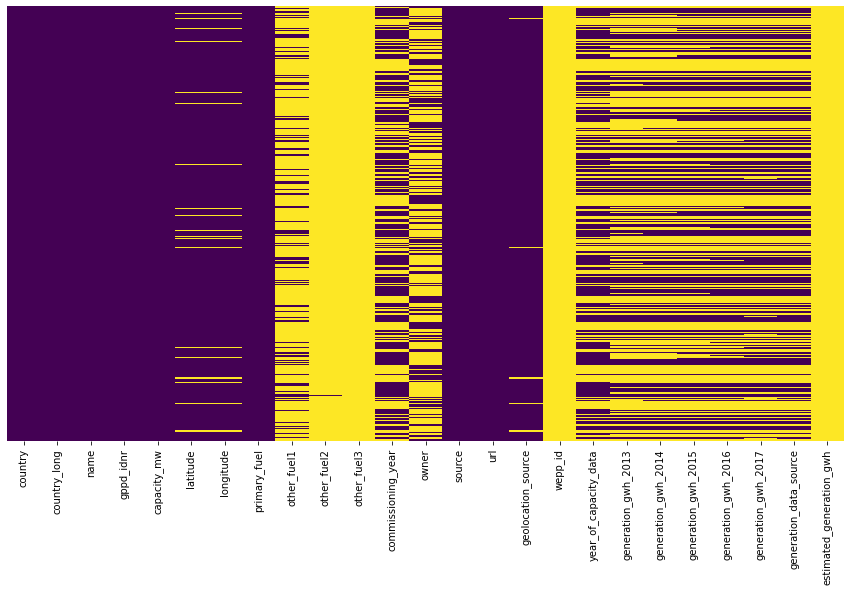

In [35]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The below mentioned columns are almost filled with null values:-
    
other fuel2, other fuel3,wepp_id and estimated_generation_gwhh 

we can drop it

In [36]:
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

<AxesSubplot:>

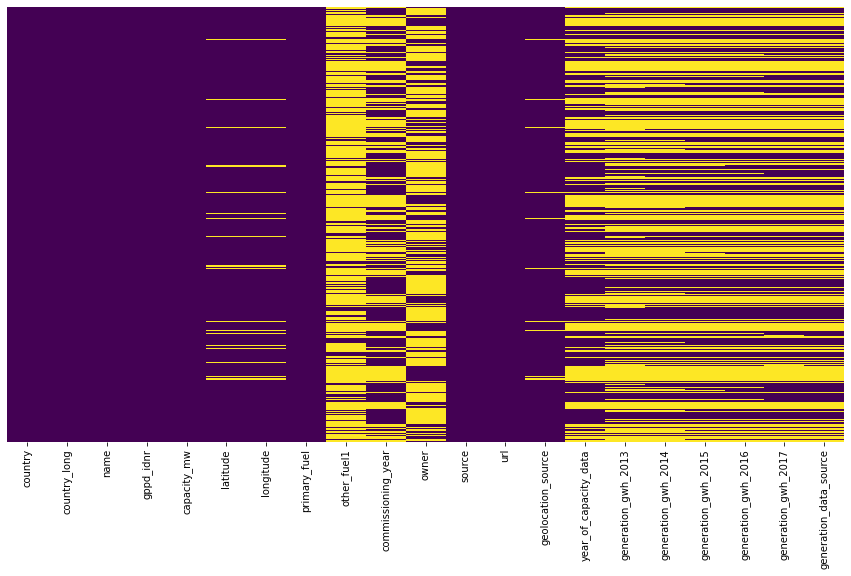

In [37]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
df.shape

(908, 21)

In [39]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [40]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

country and country_long both the columns has single value , so we can drop this column

In [41]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [42]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


# EDA

In [43]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

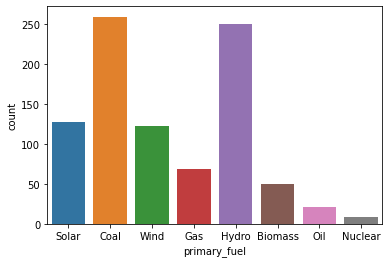

In [44]:
sns.countplot(x='primary_fuel',data=df)

(i) Maximum number of power plant is Coal -259

(ii) Hydro plant -250, Solar- 127, Wind- 123, Gas- 69, Biomass= 50, Oil - 21 , Nuclear - 21

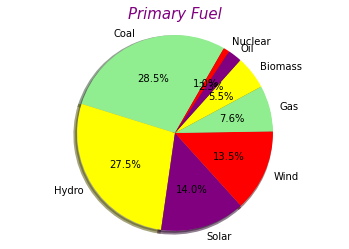

In [45]:
plt.pie(x=df['primary_fuel'].value_counts(),labels=df['primary_fuel'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Primary Fuel',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


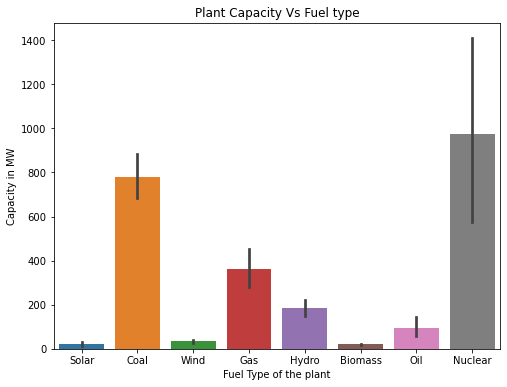

In [46]:
plt.figure(figsize=[8,6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Fuel Type of the plant')
plt.ylabel('Capacity in MW')
plt.title('Plant Capacity Vs Fuel type')
plt.show()

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

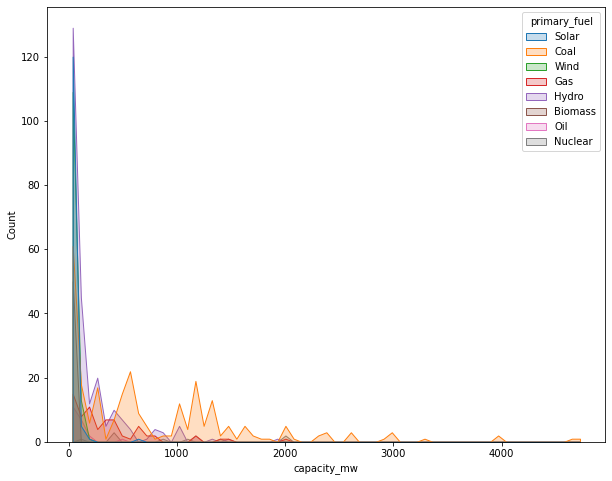

In [47]:
plt.figure(figsize=[10,8])
sns.histplot(x='capacity_mw',hue='primary_fuel',element='poly',data=df)

(i) Solar power plant has capacity of with in 150 MW

(ii) Coal power plant has range of 1-4000+ MW

(iii) Hydro power plant has range of 1500 MW

(iv) Gas power plant has range of 1500 MW

(v) Nuclear power has the capacity upto 2000MW

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

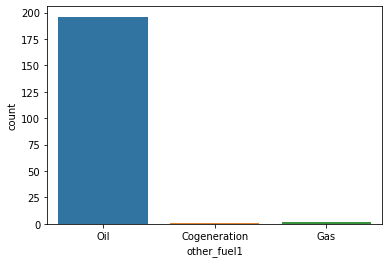

In [48]:
#
sns.countplot(x='other_fuel1',data=df)

In other fuel type power plant maximum are Oil based, few are Cogeneartion and Gas

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

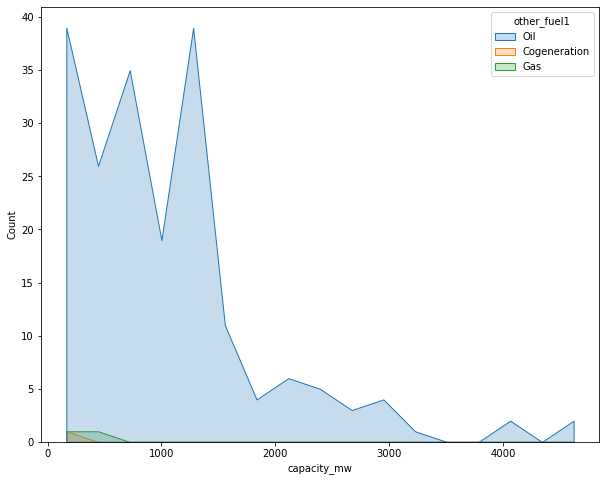

In [49]:
plt.figure(figsize=[10,8])
sns.histplot(x='capacity_mw',hue='other_fuel1',element='poly',data=df)

(i) oil powered plant has highest capacity around 4700 MW

[Text(0, 0, 'Solar Paces'),
 Text(1, 0, 'Ultratech Cement ltd'),
 Text(2, 0, 'AES'),
 Text(3, 0, 'Hindustan Pvt lt'),
 Text(4, 0, 'Dr Ssk ltd'),
 Text(5, 0, 'Ashok Ssk ltd'),
 Text(6, 0, 'Shree Sugars ltd'),
 Text(7, 0, 'Ener-t International Ltd.'),
 Text(8, 0, 'Nav Bharat Buildcon Private Limited'),
 Text(9, 0, 'MEIL Green Power Limited'),
 Text(10, 0, 'Madras Cement Limited'),
 Text(11, 0, 'DDE Renewable Energy Private Limited (DREPL)'),
 Text(12, 0, 'Electromech Maritech Private Limited'),
 Text(13, 0, 'Finehope Allied Engineering Private Limited'),
 Text(14, 0, 'Khaya Solar Projects Private Limited'),
 Text(15, 0, 'Newton Solar Private Limited'),
 Text(16, 0, 'Saidham Overseas Private Limited'),
 Text(17, 0, 'Vasavi Solar Power Private Limited'),
 Text(18, 0, 'Indian Power ltd'),
 Text(19, 0, 'Ballarpur Industries ltd'),
 Text(20, 0, 'Jk Cement ltd'),
 Text(21, 0, 'India Ltd icl)'),
 Text(22, 0, 'Bharat Petroleum Corporation Limited'),
 Text(23, 0, 'Bhilwara Energy Limited'),
 Text

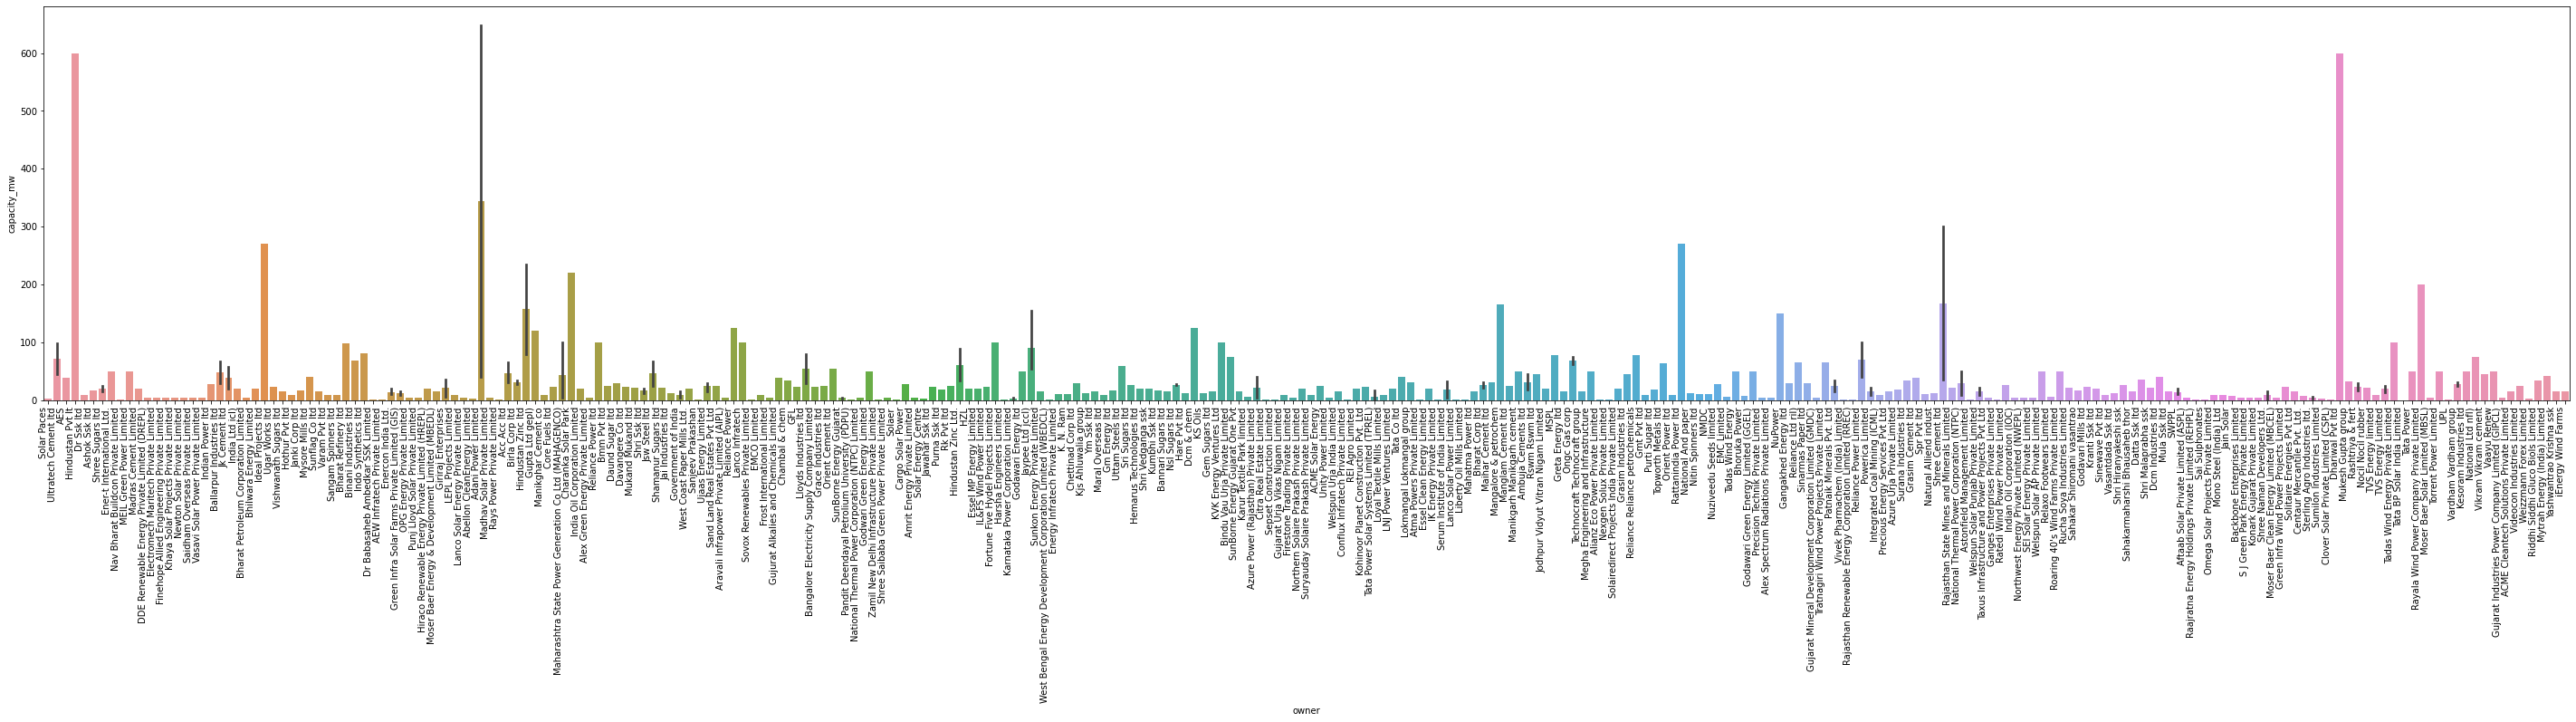

In [50]:
plt.figure(figsize=[50,8])

chart=sns.barplot(x='owner',y='capacity_mw',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')


Top 5 owner to product power are as follows
(i) Adani Power Limited

(ii) Hindustan Pvt. Ltd.

(iii) Dhariwal Pvt. Ltd.

(iv) Ideal Project Ltd.

(v) RattanIndia Ovt Ltd.

In [51]:
#extracting the average capacity in MW per year
df2=df.groupby('commissioning_year', as_index=False)['capacity_mw'].mean()

extracted the average capacity based on year saved in dataframe

In [52]:
df2.head()

,commissioning_year,capacity_mw
0,1927.0,42.0
1,1937.0,5.0
2,1939.0,17.2
3,1943.0,59.2
4,1946.0,32.0


[Text(0, 0, '1927.0'),
 Text(1, 0, '1937.0'),
 Text(2, 0, '1939.0'),
 Text(3, 0, '1943.0'),
 Text(4, 0, '1946.0'),
 Text(5, 0, '1949.0'),
 Text(6, 0, '1952.0'),
 Text(7, 0, '1953.0'),
 Text(8, 0, '1954.0'),
 Text(9, 0, '1955.0'),
 Text(10, 0, '1956.0'),
 Text(11, 0, '1957.0'),
 Text(12, 0, '1958.0'),
 Text(13, 0, '1959.0'),
 Text(14, 0, '1960.0'),
 Text(15, 0, '1961.0'),
 Text(16, 0, '1962.0'),
 Text(17, 0, '1963.0'),
 Text(18, 0, '1964.0'),
 Text(19, 0, '1965.0'),
 Text(20, 0, '1966.0'),
 Text(21, 0, '1967.0'),
 Text(22, 0, '1968.0'),
 Text(23, 0, '1969.0'),
 Text(24, 0, '1970.0'),
 Text(25, 0, '1971.0'),
 Text(26, 0, '1972.0'),
 Text(27, 0, '1973.0'),
 Text(28, 0, '1974.0'),
 Text(29, 0, '1975.0'),
 Text(30, 0, '1976.0'),
 Text(31, 0, '1977.0'),
 Text(32, 0, '1978.0'),
 Text(33, 0, '1979.0'),
 Text(34, 0, '1980.0'),
 Text(35, 0, '1981.0'),
 Text(36, 0, '1982.0'),
 Text(37, 0, '1983.0'),
 Text(38, 0, '1984.0'),
 Text(39, 0, '1985.0'),
 Text(40, 0, '1986.0'),
 Text(41, 0, '1987.0'),
 T

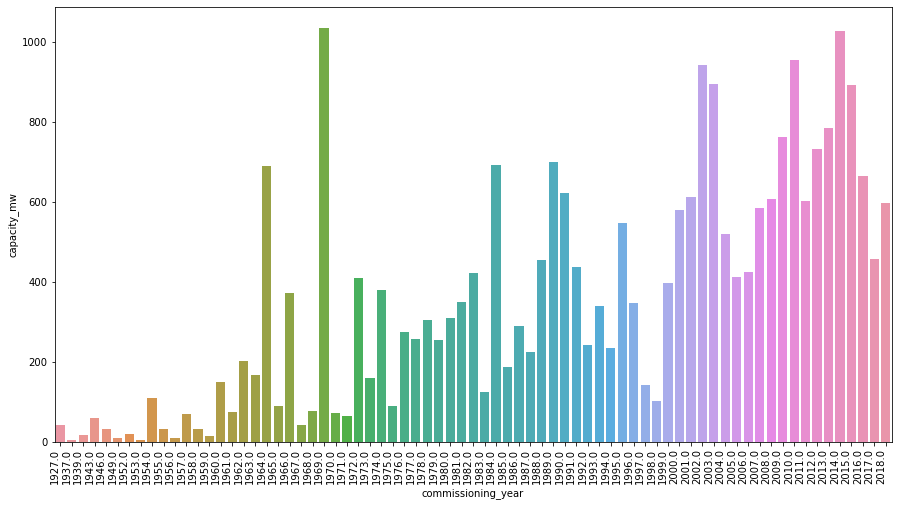

In [53]:
plt.figure(figsize=[15,8])

chart=sns.barplot(x='commissioning_year',y='capacity_mw',data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')


(i) Newer power plant has increased the capacity 

(ii) From 2014 the average capacity has declined

(iii) In 1969 the average capacity was at peak , more than 1000 MW

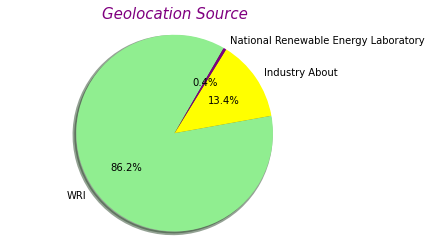

In [54]:
plt.pie(x=df['geolocation_source'].value_counts(),labels=df['geolocation_source'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Geolocation Source',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


86% of power plant belongs to World Rescource Institution

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

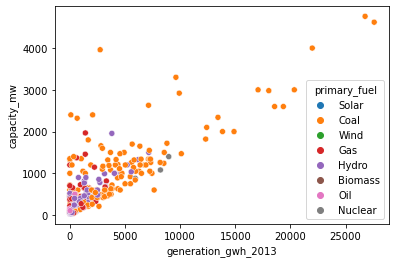

In [55]:
sns.scatterplot(x='generation_gwh_2013',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2013

(ii) Mostly is was coal power plant

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

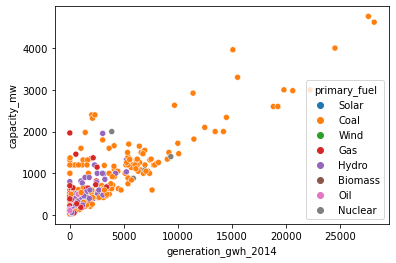

In [56]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2014

(ii) Mostly is was coal power plant

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

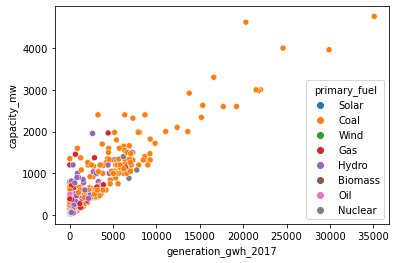

In [57]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2017

(ii) Mostly is was coal power plant

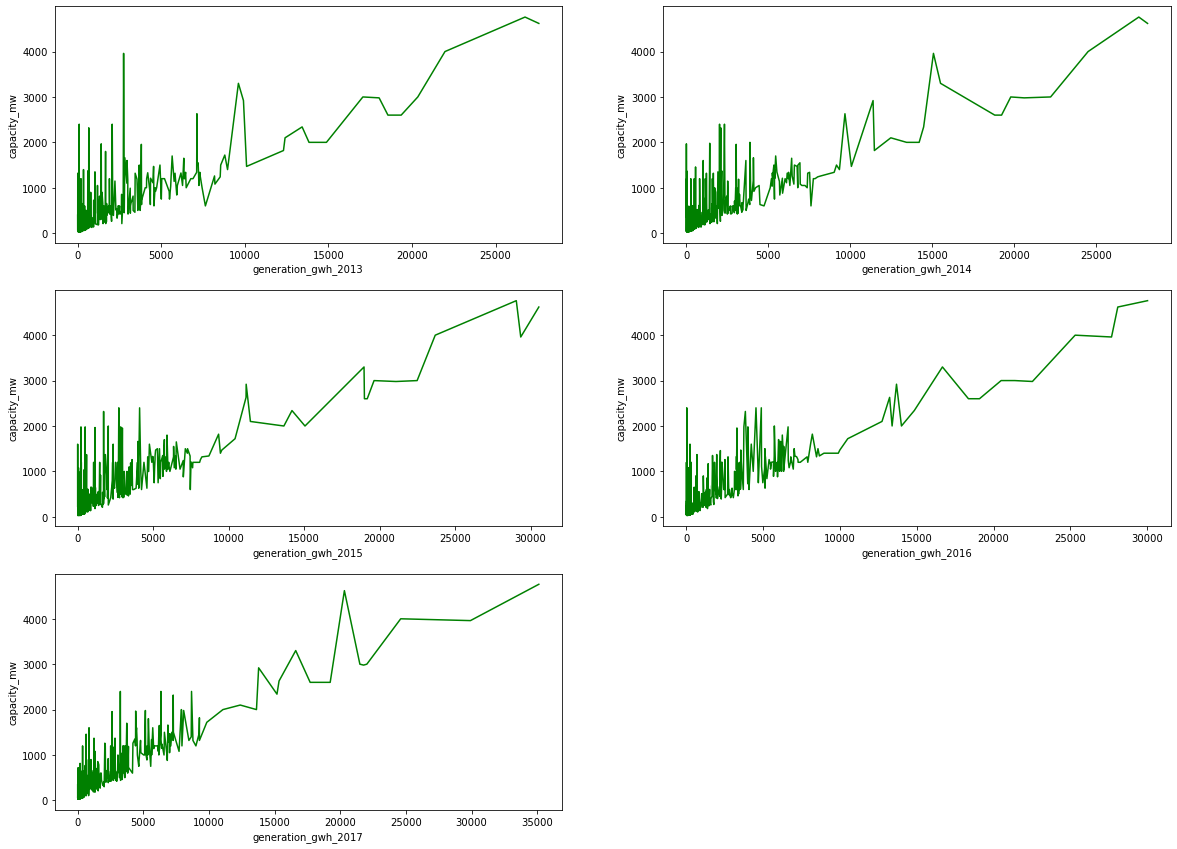

In [58]:
#fig,axes=plt.subplots(2,2,figsize=(15,12))
plt.figure(figsize=(20,20))
plotnum=1
for i in df.columns[13:18]:
    plt.subplot(4,2,plotnum)
    sns.lineplot(x=i,y='capacity_mw',data=df,color='g')
    plotnum+=1
    

(i) Increase of gwh will increase the capacity

(ii) Qty of powerplant with less than 10000 gwh is more

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    object 
 1   gppd_idnr               908 non-null    object 
 2   capacity_mw             908 non-null    float64
 3   latitude                862 non-null    float64
 4   longitude               862 non-null    float64
 5   primary_fuel            908 non-null    object 
 6   other_fuel1             199 non-null    object 
 7   commissioning_year      528 non-null    float64
 8   owner                   342 non-null    object 
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      889 non-null    object 
 12  year_of_capacity_data   520 non-null    float64
 13  generation_gwh_2013     384 non-null    float64
 14  generation_gwh_2014     401 non-null    fl

In [60]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [61]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [62]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [63]:
df['url'].value_counts()


http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

More than 50% power plant have the url is www.cea.nic.in 

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

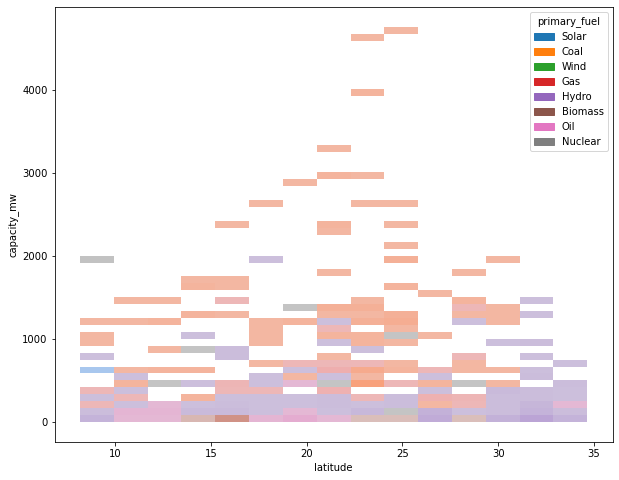

In [64]:
plt.figure(figsize=(10,8))
sns.histplot(x='latitude',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

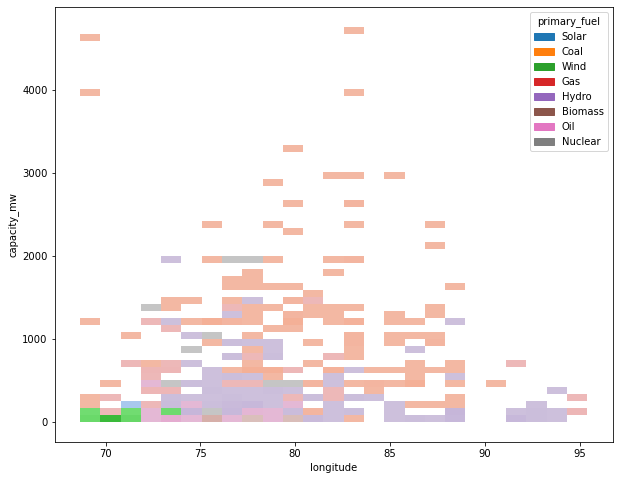

In [65]:
plt.figure(figsize=(10,8))
sns.histplot(x='longitude',y='capacity_mw',hue='primary_fuel',data=df)

The power plant with highest capacity is within latitude 15- 30
and longitude 75 -90 

<AxesSubplot:>

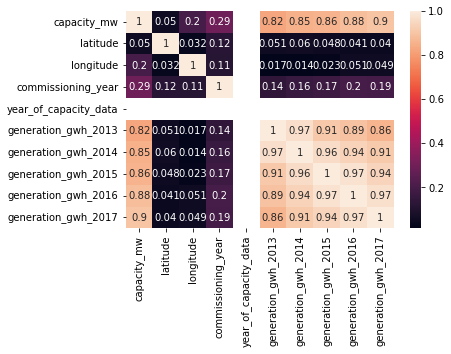

In [66]:
sns.heatmap(df.corr(),annot=True)

In [67]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


Statistical View

# # Data Preprocessing  Part II

In [68]:
# filling null values of categorical column using simple imputer
from sklearn.impute import SimpleImputer

In [69]:
simp=SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)

In [70]:
simp.fit(df[['geolocation_source']])
df['geolocation_source']=simp.transform(df[['geolocation_source']])

In [71]:
df['geolocation_source'].isnull().sum()

0

FIlled the null value of geolocation_source using most frequent strategy

In [72]:
from sklearn.impute import KNNImputer 

In [73]:
kimp=KNNImputer(n_neighbors=2)

In [74]:
df[['latitude','longitude']]=kimp.fit_transform(df[['latitude','longitude']])

In [75]:
df[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

<AxesSubplot:>

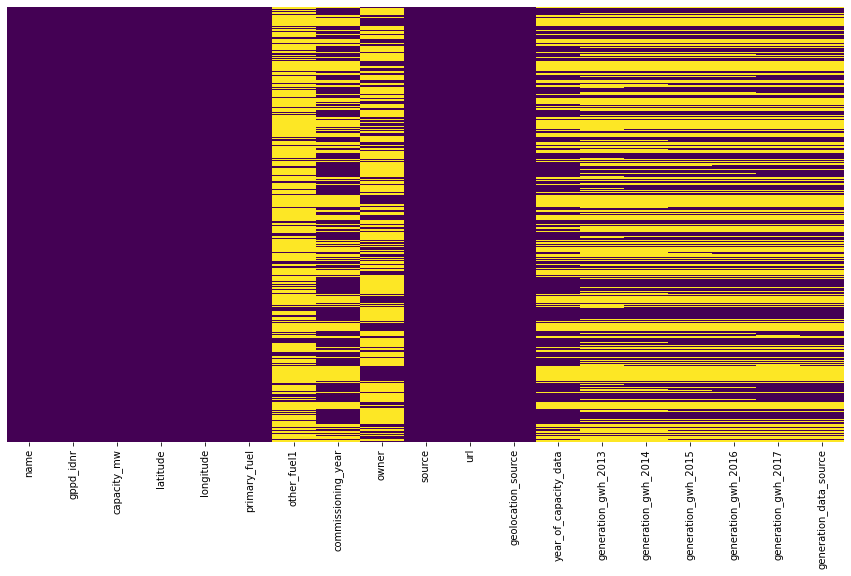

In [76]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

owner column with 623 number of null values will not play in predicting
our target value so we will dropit

In [78]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

year of capacity data contains 388 null values and rest all 2018, so its also not significant feature , we will drop it

In [79]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Other fuel 1 has 709 null values out of 908, filling the null value 
may mislead the prediction so we will drop this column also

In [80]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

Generation data source has single categorical type value in 450 rows
rest all are null, so its unimportant for prediction traget. We can dropit.

In [81]:
df.drop(['owner','year_of_capacity_data','other_fuel1','generation_data_source'],axis=1,inplace=True)

<AxesSubplot:>

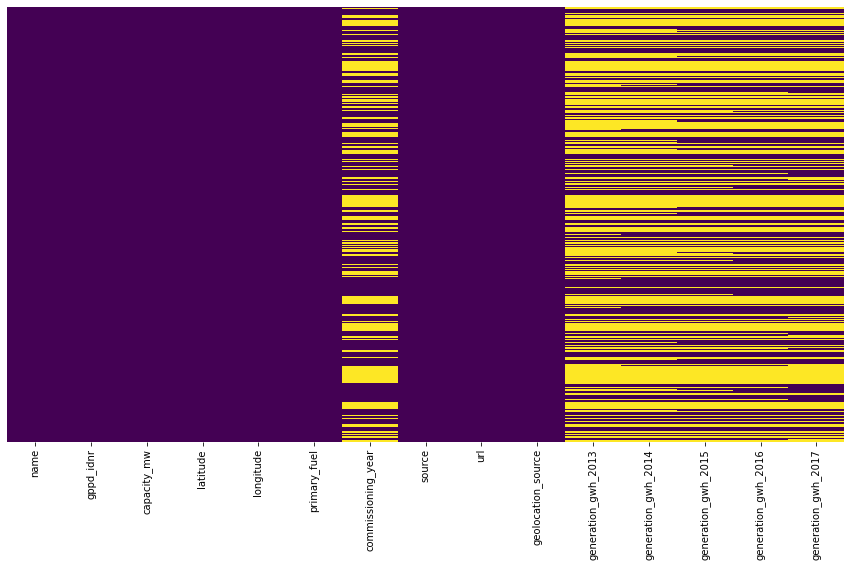

In [82]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [83]:
# filling up the null value remainig categorical columns

cols=['commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
simp=SimpleImputer(missing_values=np.nan,strategy='median',verbose=0)
for i in cols:
    simp.fit(df[[i]])
    df[i]=simp.transform(df[[i]])



Filled up the null values with median strategy 

<AxesSubplot:>

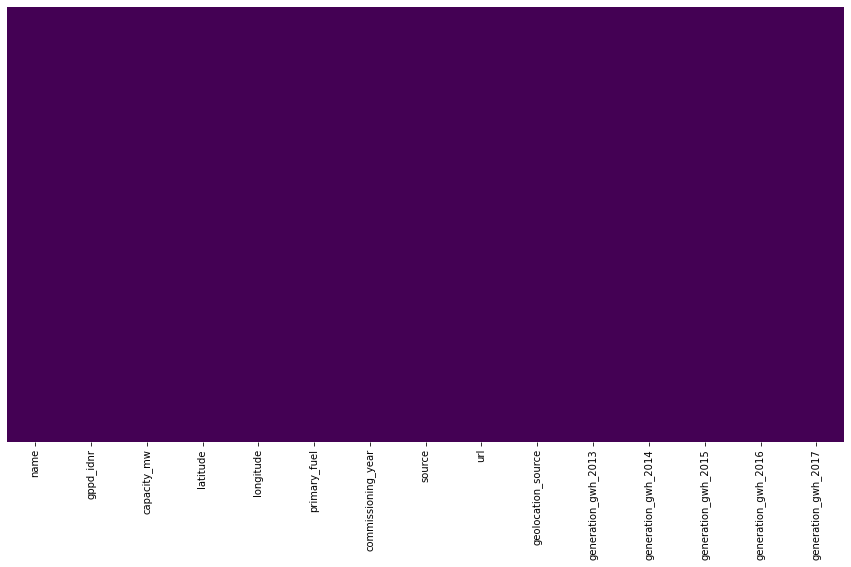

In [84]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we have removed all the null values of the dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             908 non-null    float64
 4   longitude            908 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   commissioning_year   908 non-null    float64
 7   source               908 non-null    object 
 8   url                  908 non-null    object 
 9   geolocation_source   908 non-null    object 
 10  generation_gwh_2013  908 non-null    float64
 11  generation_gwh_2014  908 non-null    float64
 12  generation_gwh_2015  908 non-null    float64
 13  generation_gwh_2016  908 non-null    float64
 14  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [86]:
# converting into int
df['commissioning_year']=df['commissioning_year'].astype('int64')

In [87]:
df['age']=df['commissioning_year'].apply(lambda x: 2021-x)

In [88]:
df.drop(['name','gppd_idnr','url','commissioning_year'],axis=1,inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   source               908 non-null    object 
 5   geolocation_source   908 non-null    object 
 6   generation_gwh_2013  908 non-null    float64
 7   generation_gwh_2014  908 non-null    float64
 8   generation_gwh_2015  908 non-null    float64
 9   generation_gwh_2016  908 non-null    float64
 10  generation_gwh_2017  908 non-null    float64
 11  age                  908 non-null    int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 85.2+ KB


# Encoding of Categorical Data

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['primary_fuel','geolocation_source','source']]=df[['primary_fuel','geolocation_source','source']].apply(le.fit_transform)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   source               908 non-null    int32  
 5   geolocation_source   908 non-null    int32  
 6   generation_gwh_2013  908 non-null    float64
 7   generation_gwh_2014  908 non-null    float64
 8   generation_gwh_2015  908 non-null    float64
 9   generation_gwh_2016  908 non-null    float64
 10  generation_gwh_2017  908 non-null    float64
 11  age                  908 non-null    int64  
dtypes: float64(8), int32(3), int64(1)
memory usage: 74.6 KB


# Removing the Outliers

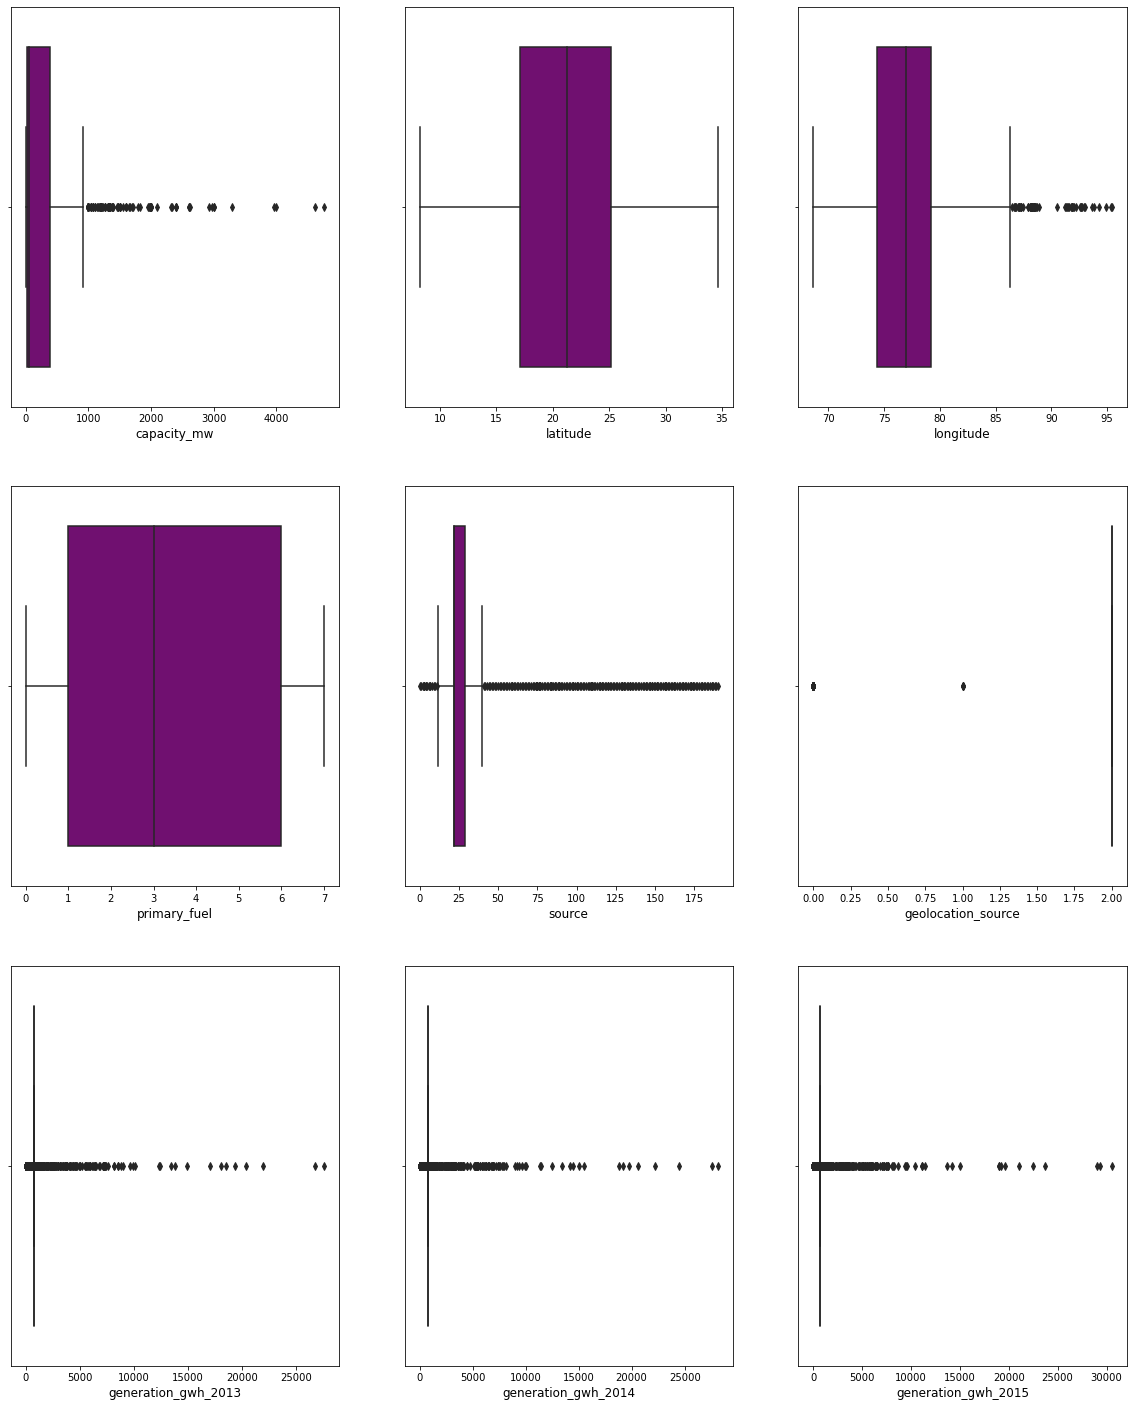

In [92]:
plt.figure(figsize=(20,25))
plotnum=1
for col in df.columns:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

In [93]:
# Features having outliers
features = df[['longitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','age']]


In [94]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [95]:
df.shape

(908, 12)

In [96]:
df=df[(z<3).all(axis=1)]

In [97]:
df.shape

(852, 12)

In [98]:
loss=(908-852)*100/908
loss

6.167400881057269

6% Data Loss is acceptable

# Correlation 

<AxesSubplot:>

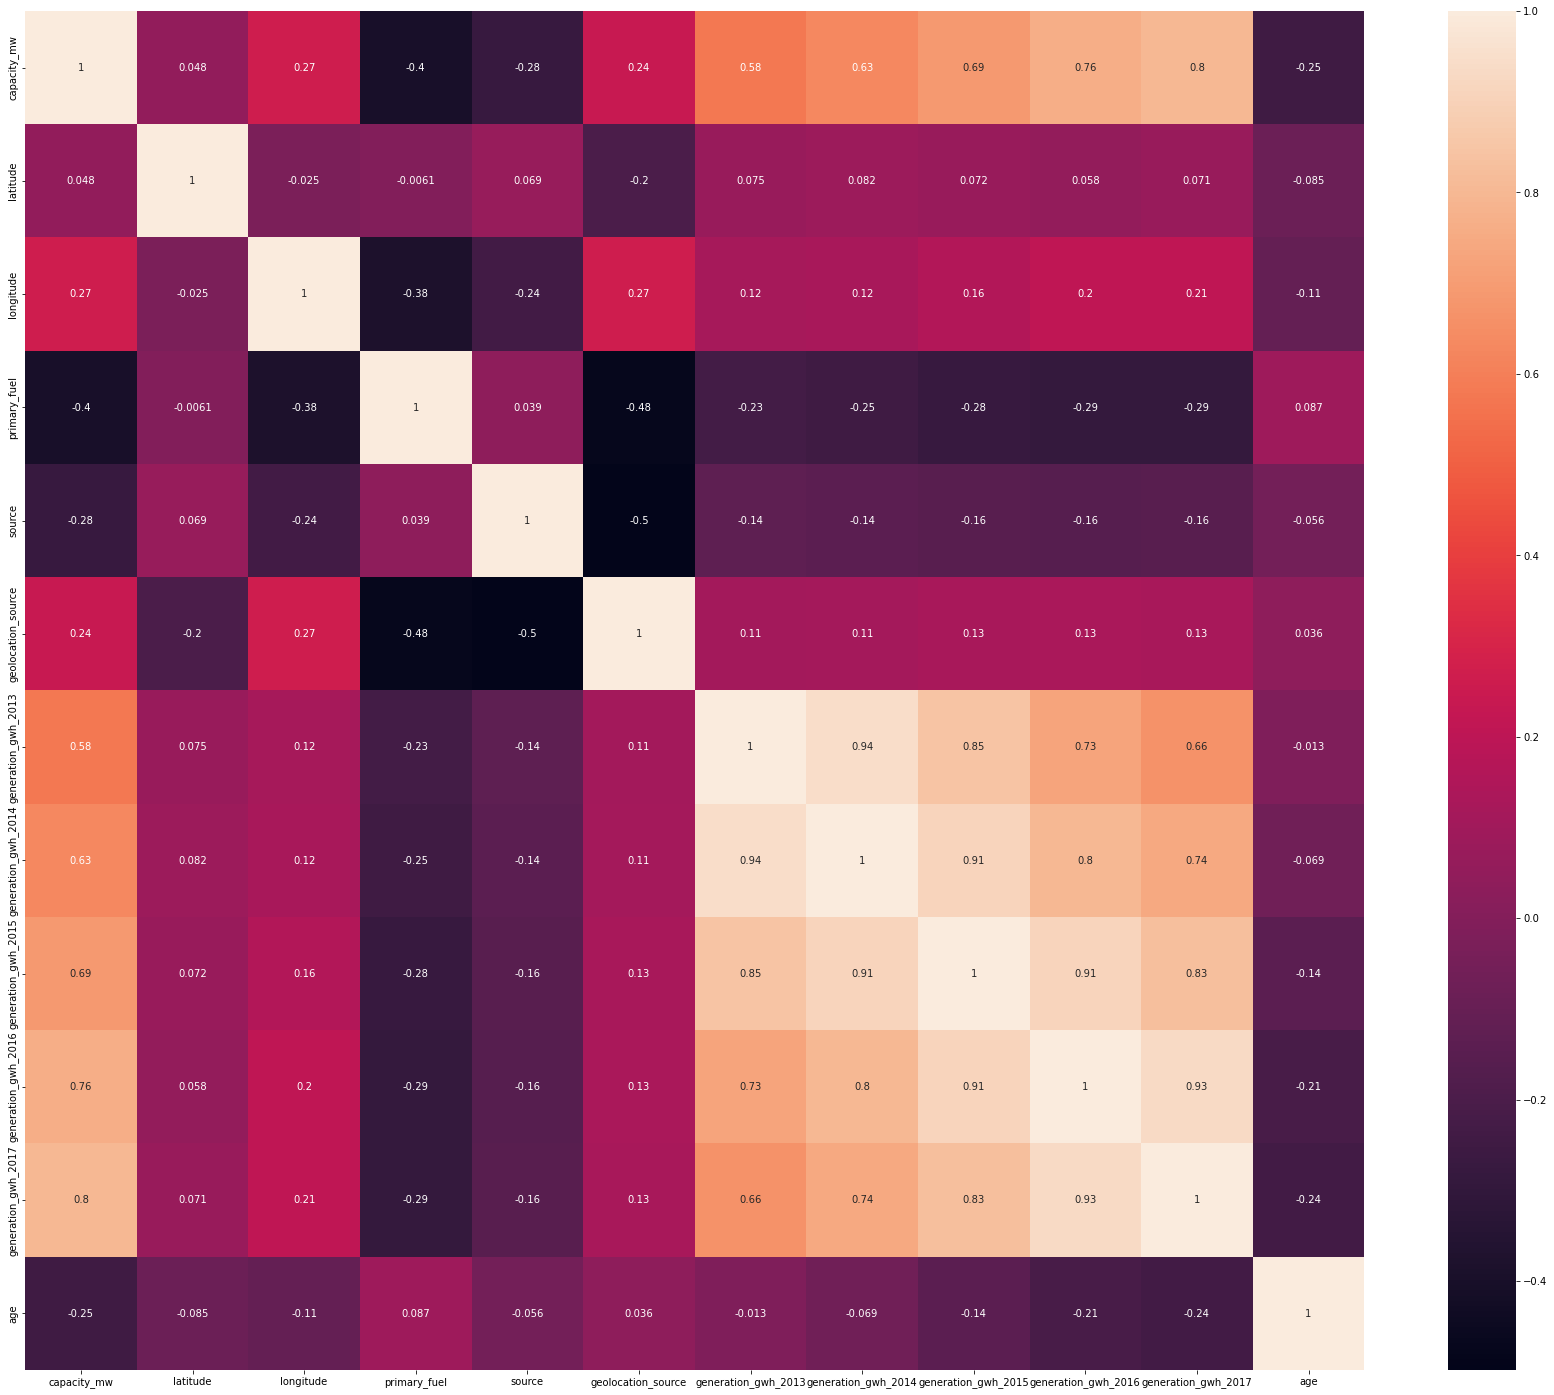

In [99]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,color='blue')


(i) The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.
    
  

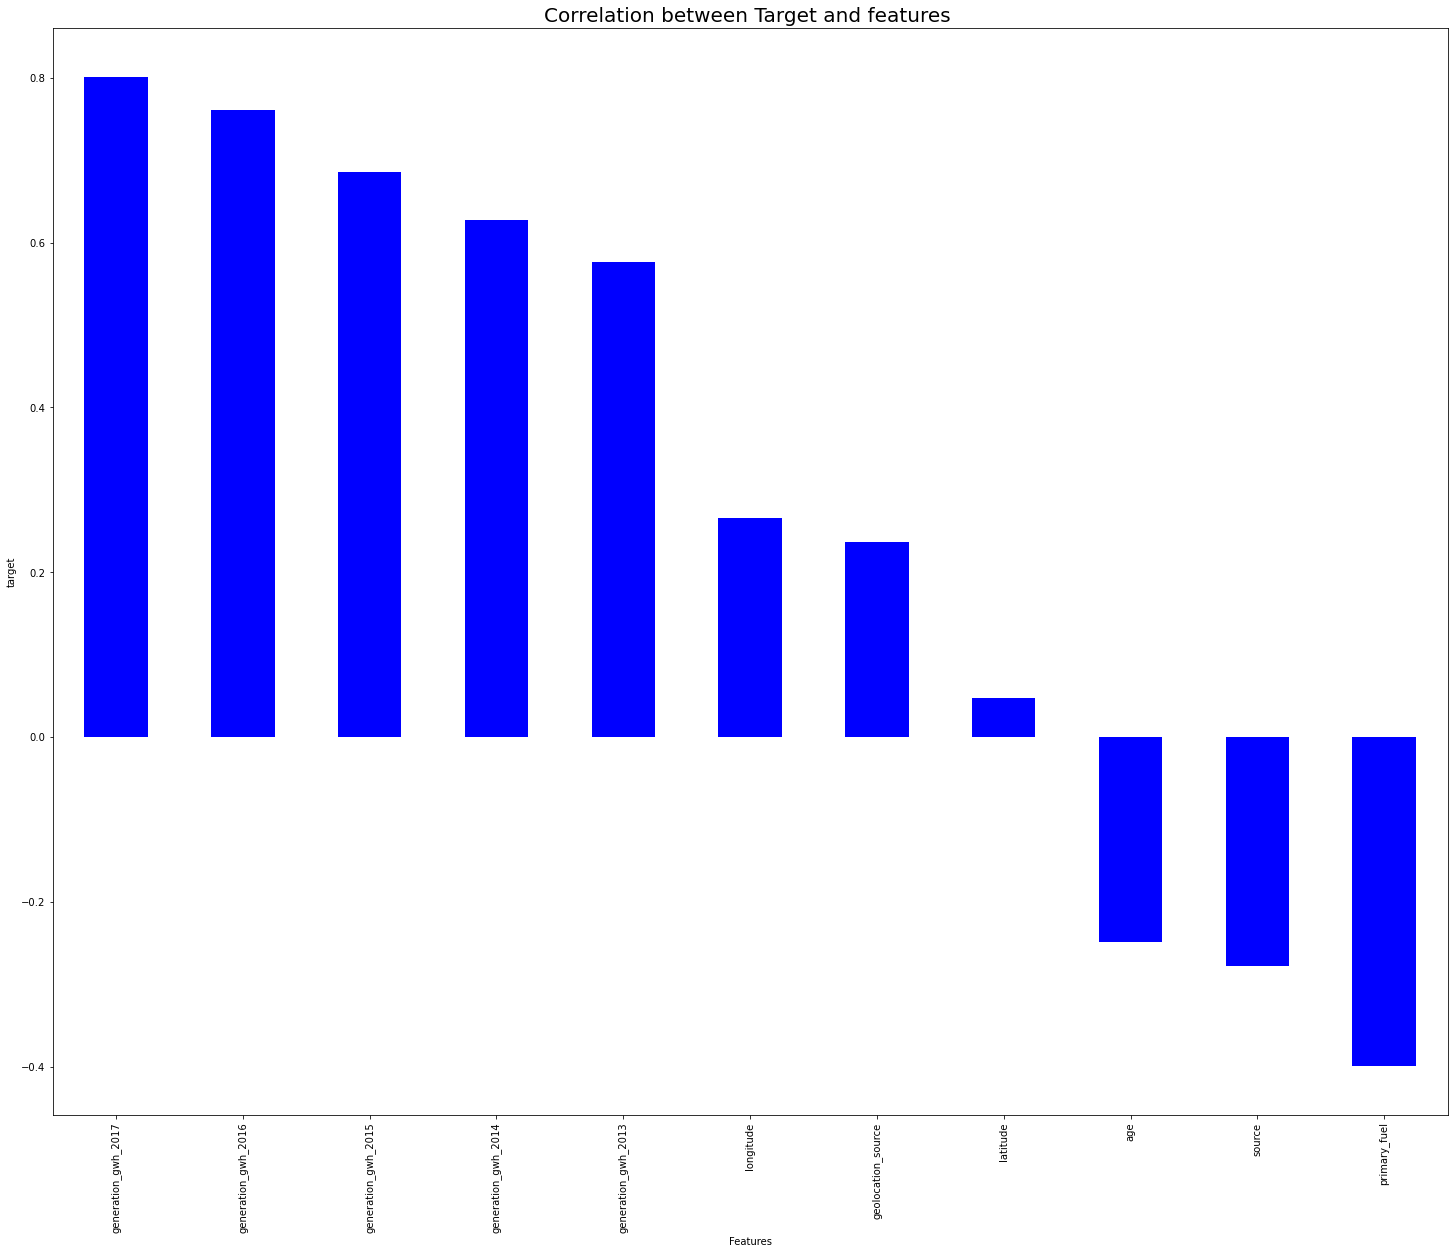

In [100]:
# generationg corraltion bar graph
plt.figure(figsize=(25,20))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

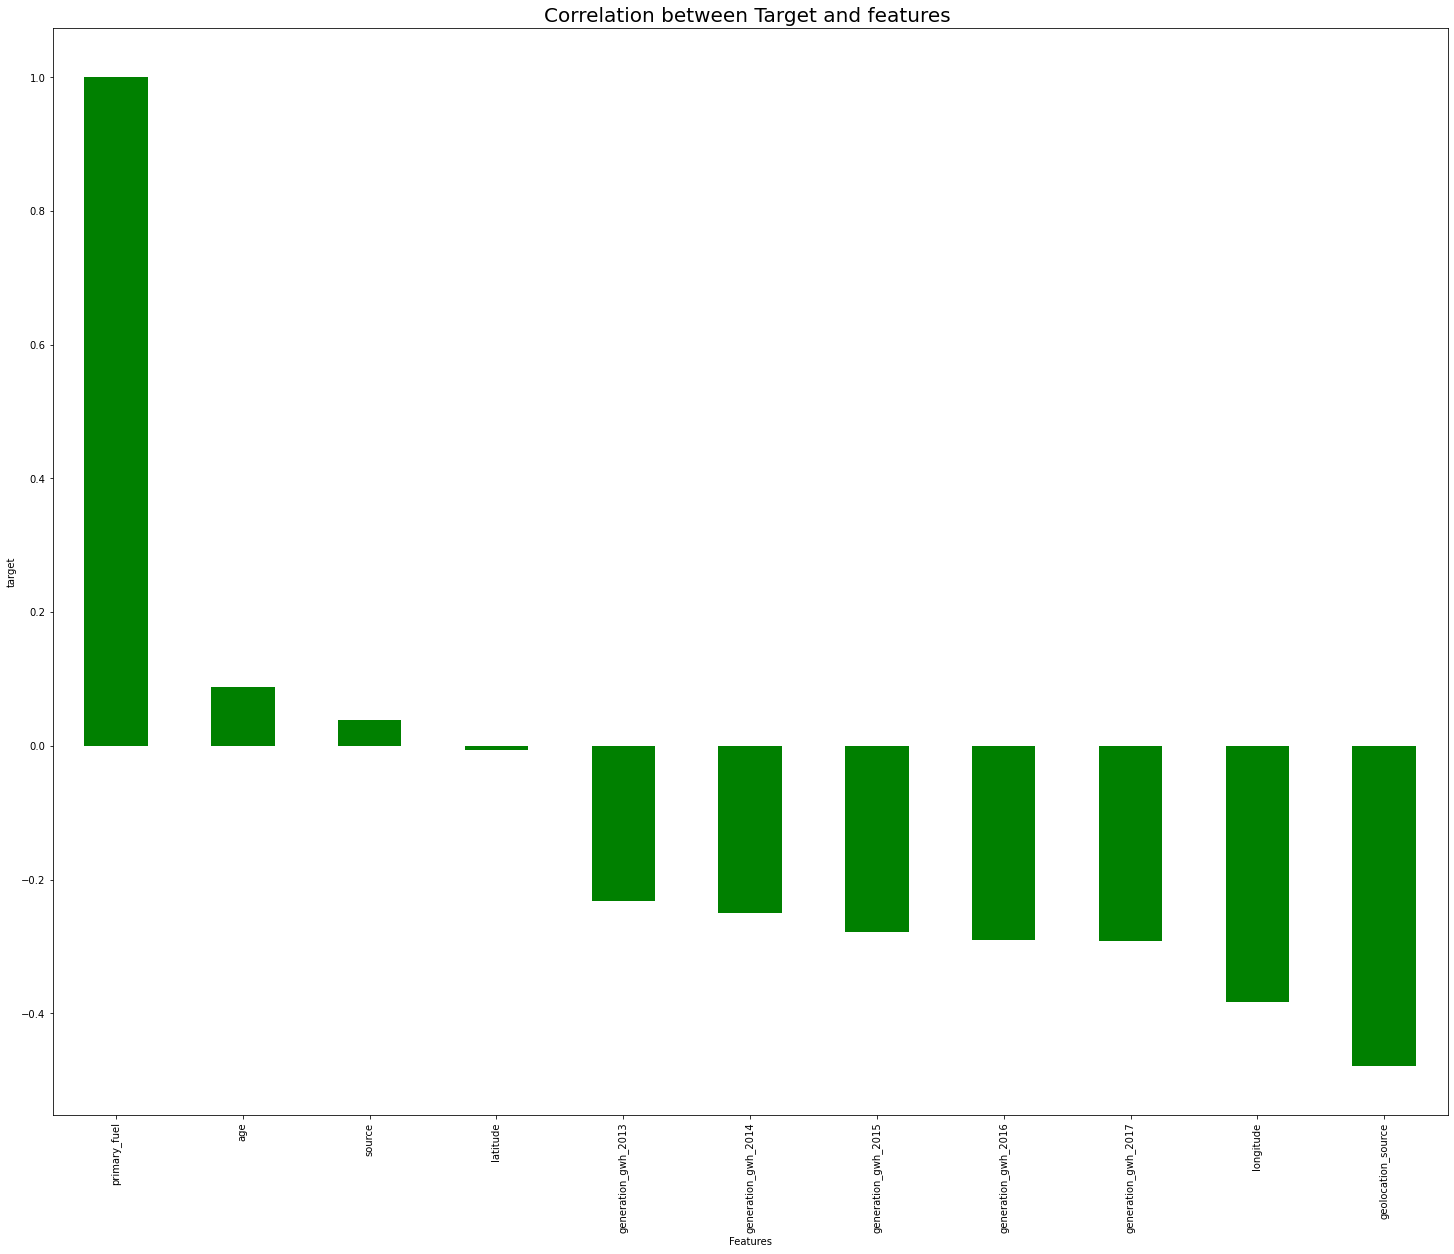

In [101]:
# generationg corraltion bar graph
plt.figure(figsize=(25,20))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

# Splitting of Target and Features

In [102]:
x=df.drop("capacity_mw",axis=1)
y=df['capacity_mw']

# Removing the skewness

In [103]:
#checking the skewness
x.skew()

latitude              -0.108867
longitude              0.861390
primary_fuel           0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
age                    1.209638
dtype: float64

The following columns have skewness 

    longitude
    
    generation_gwh_2013
    
    generation_gwh_2014
    
    generation_gwh_2015
    
    generation_gwh_2016
    
    generation_gwh_2017
    
    age
   

In [104]:
skew_cols=['longitude','generation_gwh_2013','generation_gwh_2014','source','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
x[skew_cols]=scaler.fit_transform(x[skew_cols].values)
x.skew()

latitude              -0.108867
longitude              0.000185
primary_fuel           0.413982
source                -0.173813
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
age                    0.026590
dtype: float64

Skewness removed

# Scaling of features

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# MultiColinearity 

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,1.090834,latitude
1,1.299201,longitude
2,1.647250,primary_fuel
3,1.292864,source
4,1.717529,geolocation_source
5,5.479234,generation_gwh_2013
6,7.245282,generation_gwh_2014
7,6.178753,generation_gwh_2015
8,9.685191,generation_gwh_2016
9,5.200580,generation_gwh_2017


Seems there are no Multicolinearity

# Spliting of features with best random state

as the target is contineous value so we will go for Regression Model

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)



Maximum r2 score is  0.8545776528003693 at Random_state 7


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=7)

# Seaching for best model

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [110]:
def model_test(model,x,y):
    model.fit(x,y)
    pred=model.predict(x_test)
    print('R2_score:',r2_score(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(mean_squared_error(y_test,pred))

In [111]:
lr=LinearRegression()
model_test(lr,x_train,y_train)

R2_score: 0.5903080804954435
194.18545143009592
68814.63294664725


In [112]:
rfr=RandomForestRegressor()
model_test(rfr,x_train,y_train)

R2_score: 0.8483669117569522
87.10828767760336
25469.321734806283


In [113]:
dtr=DecisionTreeRegressor()
model_test(dtr,x_train,y_train)

R2_score: 0.5564639138835685
136.02620182291668
74499.32867019922


In [114]:
knn=KNN()
model_test(knn,x_train,y_train)

R2_score: 0.7757566431266232
101.26333828125
37665.43482875265


In [115]:
svr=SVR()
model_test(svr,x_train,y_train)

R2_score: -0.12852506116013052
227.55472415629396
189554.72187184135


In [116]:
SGD=SGDRegressor()
model_test(SGD,x_train,y_train)

R2_score: 0.5935904533629836
192.59674745334365
68263.30334183846


# Cross Validation Check

In [117]:
print('LR',cross_val_score(lr,x,y,cv=5).mean())
print('RFR',cross_val_score(rfr,x,y,cv=5).mean())
print('DTR',cross_val_score(dtr,x,y,cv=5).mean())
print('KNN',cross_val_score(knn,x,y,cv=5).mean())
print('SVR',cross_val_score(svr,x,y,cv=5).mean())
print('SGD',cross_val_score(SGD,x,y,cv=5).mean())

LR 0.5123772365410406
RFR 0.7620508953636381
DTR 0.5268174935657115
KNN 0.7290124349410545
SVR -0.13013638266941757
SGD 0.5166171843669278


After comparing the R2 Score and Cross validation score the best model found is RandomForestRegressor

# Hyper Parameter Tuning

In [217]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[3,4,5,10,20],
           'max_depth':[2,4,6]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)
print('Best Parameters',GCV.best_params_)

Best Parameters {'criterion': 'mae', 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 4}


In [218]:
fin_model=RandomForestRegressor(criterion='mae',max_depth=6,max_features='log2',min_samples_split=4)
model_test(fin_model,x_train,y_train)

R2_score: 0.8623677588466185
81.42187390625
23117.644517001627


After hyper tuning the model performance has increased 1%

# Saving the model

In [220]:
import joblib
joblib.dump(fin_model,'Global_Power_Plant_Reg.obj')

['Global_Power_Plant_Reg.obj']

# Second Part of Modeling cosidering 'Primary_fuel' as target

Splitiny of Target and Features

In [221]:
x=df.drop("primary_fuel",axis=1)
y=df['primary_fuel']

# Removing Skewness

In [222]:
#checking the skewness
x.skew()

capacity_mw            2.134177
latitude              -0.108867
longitude              0.861390
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
age                    1.209638
dtype: float64

In [223]:
skew_cols=['longitude','generation_gwh_2013','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
x[skew_cols]=scaler.fit_transform(x[skew_cols].values)
x.skew()

capacity_mw            2.134177
latitude              -0.108867
longitude              0.000185
source                -0.173813
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
age                    0.026590
dtype: float64

# Scaling of features

In [224]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Multicolinearity

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,2.062946,capacity_mw
1,1.076102,latitude
2,1.185921,longitude
3,1.234652,source
4,1.339625,geolocation_source
5,5.478146,generation_gwh_2013
6,7.243274,generation_gwh_2014
7,6.197518,generation_gwh_2015
8,9.686219,generation_gwh_2016
9,5.543886,generation_gwh_2017


# Checking Class Imbalance`

In [226]:
y.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

There is class imbalance, so we will balance it using SMOTE

In [228]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [230]:
y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

# Spliting of features for best random state

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9149305555555556 at random_state 42


In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=88)

In [233]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [234]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=26)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [235]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [236]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.7083333333333334
[[54  0  0  0  0  0  0 14]
 [ 5 24  6  7  3  2  0  4]
 [ 1  8 12  9  4 11  0 12]
 [ 1  5  7 25  6  8  1 10]
 [ 0  0  0  2 65  2  0  0]
 [ 2  0  0  0  0 52  0  7]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  3  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        68
           1       0.65      0.47      0.55        51
           2       0.48      0.21      0.29        57
           3       0.54      0.40      0.46        63
           4       0.83      0.94      0.88        69
           5       0.69      0.85      0.76        61
           6       0.98      1.00      0.99        57
           7       0.52      0.94      0.67        54

    accuracy                           0.71       480
   macro avg       0.69      0.70      0.68       480
weighted avg       0.70      0.71      0.69       480

----------------------------------------
DecisionTreeClassifier()
0.8729166666666667
[[61  6

In [237]:
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.721875
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.8802083333333333
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.9276041666666668
----------------------------------------
Mean Accuracy of  GaussianNB()
0.603125
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.8713541666666667
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.2859375
----------------------------------------


After comparing the result we found that the RandomForestClassifier is the 
best model for this dataset with 91% accuracy

# Hyper Parameter Tunining

In [238]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5]}


In [239]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)
GSV.best_params_


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 200}

In [240]:
final_mod=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=2,n_estimators=200)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.61111111111111


The accuracy level has increased a lot after Hypertuning at 98%

# Saving the Model

In [241]:
import joblib
joblib.dump(final_mod,'Global_Power_Plant_Class.obj')

['Global_Power_Plant_Class.obj']